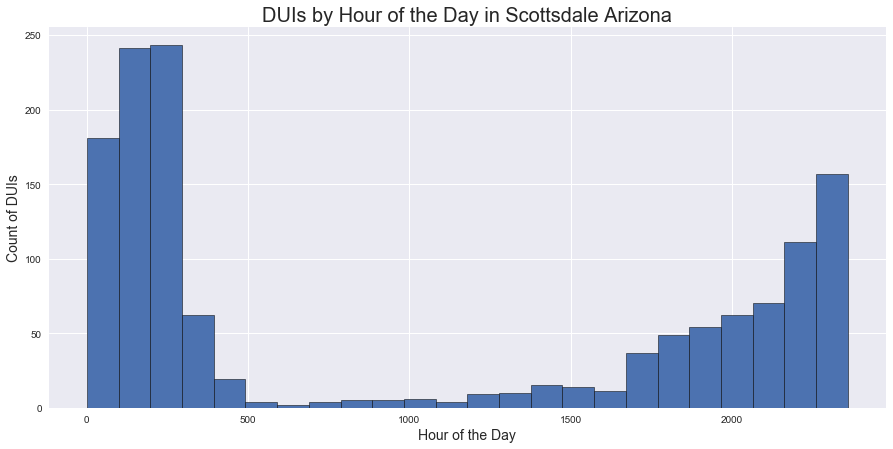

In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/mrkjh/Documents/GitHub/City-of-Scottsdale-DUI-Concentrations/DUI_Citations.csv') #opens data from CSV file
time = np.array(data['Citation Time'])

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size of the histogram
plt.title("DUIs by Hour of the Day in Scottsdale Arizona",fontsize=20)
plt.xlabel("Hour of the Day",fontsize=14)
plt.ylabel("Count of DUIs",fontsize=14)

with plt.style.context(('fivethirtyeight')):
    plt.hist(time,bins=24,histtype='bar',edgecolor='black')
plt.show()
    

                               Street  _Count_ _Percent_
128                E Indian School Rd      202    10.76%
434                   N Scottsdale Rd      138     7.35%
54                     E Camelback Rd       91     4.85%
391  N Hayden Rd / E Indian School Rd       59     3.14%
389                       N Hayden Rd       56     2.98%
200                         E Shea Bl       54     2.88%
159                     E McDowell Rd       43     2.29%
62   E Camelback Rd / N Scottsdale Rd       28     1.49%
415                       N Miller Rd       28     1.49%
131  E Indian School Rd / N Miller Rd       25     1.33%


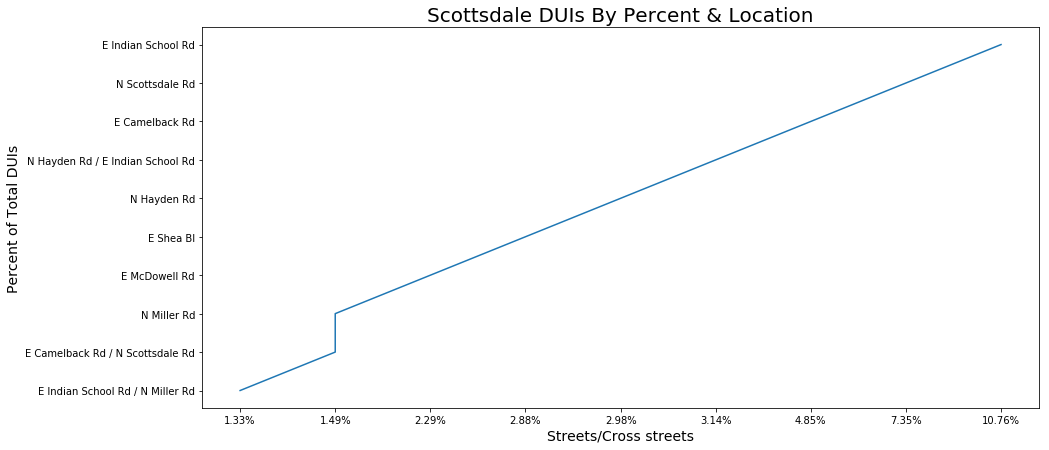

In [59]:
# opens SQL query directly in Python, rather than open from CSV
 
# import libraries
# pyodbc for ODBC connection
import pyodbc
# pandas for 'excel' like sheets
import pandas as pd
# datetime for date computer date

# if you do not use windows authentication, use the following instead:
# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query for testing if a series of three
# 999 exist in a journal entry amount
DUILocations = '''
  select 
	 A.[Street]
	 ,A._Count_
	 ,convert(varchar,
			round(
				 convert(float, A._Count_)/convert(float, B._Total_)*100
				 ,2
			 )
	 ) + '%'as _Percent_
  from    (
		  select 
	      [Street]
		  ,count([Charge Description]) as _Count_
		  from [dbo].[spd_PDCitations$]
		  where [Charge Description] like '%DUI%'
		  group by [Street]
		  
  ) as A

  cross join  (
				select 
			    sum(_Count_) as _Total_
			    from (
				
				  select 
					[Street]
	               ,count([Charge Description]) as _Count_
                   from [dbo].[spd_PDCitations$]
                   where [Charge Description] like '%DUI%'
                   group by [Street]) as C  --interestingly an alias is needed here, even though I'm not calling the alias anywhere else in the querry
 ) as B 
			   
  group by A.[Street], A._Count_, (convert(float, A._Count_)/convert(float, B._Total_)*100)
  
  '''

# save the sql query to a pandas dataframe, or excel like sheet
DUILocations = pd.read_sql(DUILocations, connection)
connection.close()

#business_licenses.sort_values(['LicenseNumber'], ascending=[1])


print(DUILocations.sort_values(['_Count_'], ascending=[0]).head(10))

##############

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("Scottsdale DUIs By Percent & Location",fontsize=20)
plt.xlabel("Streets/Cross streets",fontsize=14)
plt.ylabel("Percent of Total DUIs",fontsize=14)


top10 = DUILocations.sort_values(['_Count_'], ascending=[0]).head(10)

y = top10.sort_values(['_Count_'], ascending=[1]).loc[:,'_Percent_']

x = top10.sort_values(['_Count_'], ascending=[1]).loc[:,'Street']

plt.plot(y,x)